<a href="https://colab.research.google.com/github/hemantsingla96/credit-card-approval-prediction/blob/main/Credit_Card_Approval_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'credit-card-approval:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F4621749%2F7875621%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240727%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240727T081026Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D2f31b50311668792a548714b036b6961bd2d3f46e8bc4e5f1a322036e964bd3783dac7c55e1dbc4215ca89dd735e5d948ad674c36c13a58fe32ee02452e04c0f477ef56e8933159ae12aa7fb8086ecff67c1c45dca0de01a3c5c90015cd05f780cb5b85d0573dffe1a54ee831b9d32ded6880d298de0e8cad132cf6d5be77aa01029a68660bed0846efea4b1b78f58a24e1c66e1159683277a8ec2cd513217c1c32e41c40d8c5e1089eed40056d21a06ed85aba93bab13b7545ceb06c21ef55bcd346be718007f51faa96dee66e19101fd3efc55b07011654d9ad8690c8750beebe5462cdf13186aae3f1b78d58e99bdea236996455d1f89f68a120ac00b5126'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 34254 bytes downloaded
Downloaded and uncompressed: credit-card-approval
Data source import complete.


Commercial banks get a lot of requests for credit cards. But, they often reject many of them because of reasons like having too much debt,low income, or too many inquiries on a person's credit history. Analyzing these requests manually takes a lot of time and can lead to mistakes.Thankfully, we can use machine learning to automate this process, just like most banks do. In this guide, we'll make a credit card approval predictor using machine learning techniques

**Section 1.** Why is your proposal important in today’s world? How predicting a good client is worthy for a bank?

Predicting good client is crucial for banks to minimize creditr risk and make informed lending decisions in today's world where DATA SCIENCE & ML are becoming integral to financial institution accurate credit card approvalpredictions can significantly impact a bank's profitability and customer satisfaction

**2. How is it going to impact the banking sector?**

Accurate credit card approval predictions can lead to reduced default rates, lower financial losses, and improved customer experiences. This can positively impact a bank's profitability, reputation, and competitiveness in the market.

**3. If any, what is the gap in the knowledge or how your proposed method canbe helpful if required in the future for any bank in India?**

The proposed method can address the gap in credit assessment by incorporating advanced data analysis and machine learning techniques. Its adaptability makes it valuable for banks in India and beyond, as it can continuously evolve to consider new data sources and enhance creditworthiness assessments.

**Section 2: Initial Hypotheses**

In the Data Analysis (DA) track, we will aim to identify patterns in the data and important features that may impact a Machine Learning (ML) model. Our initial hypotheses are:

**Hypothesis 1:** Income type, annual income, and education level are crucial factors in predicting credit card approval.

**Hypothesis 2:** Car ownership, property ownership, and family size may influence credit card approval decisions.

**Hypothesis 3:** The length of employment and the presence of a mobile phone or email address could be relevant features.

**Hypothesis 4:** Gender, marital status, and housing type may also play a role in credit card approval.

**Section 3: Data Analysis Approach**

Our data analysis approach will involve: Exploratory Data Analysis (EDA) to identify important patterns, correlations, and outliers in the data. Feature engineering techniques to create relevant features that can improve model performance. Utilizing visualization tools to justify our findings and provide insights into the relationships within the data.

**Feature Engineering**

This Project required some feature Engineering techniques like onehot encoding,label encoding to transform the categorical variable into numerical variable and feature engineering like standard scaler to normalize the data for machine learning

**justification of data analysis approach**

Here we used visulisation tools like boxplot to determine the outlier and histogram to show the distribution of data. Replace the null value with median and mode to make the data more suitable for machine learning

**Section 4: Machine Learning Approach**

We will use various machine learning models, including but not limited to logistic regression, decision trees, random forests,SVM and XGBoost, to predict credit card approval based on customer information.

**Justification for Model Selection:**

Logistic Regression: A simple yet interpretable model to establish a baseline. Decision Trees and Random Forests: To capture non-linear relationships and feature interactions. XGBoost: To improve predictive accuracy by combining multiple weak models

**Steps to Improve Model Accuracy:**

Feature selection to identify the most relevant variables. Hyperparameter tuning for model optimization. Cross-validation to assess model performance. Evaluation metrics, such as accuracy, precision, recall, and F1-score, to justify the chosen model.

**Comparison of Models:**

We compared the performance of at least four machine learning models using classification_report, accuracy_score, confusion_matrix and cross valiation to determine the most suitable model for credit card approval prediction. XGBoost Model is giving highest accuracy of 90 %, hence we will use XGBoost Model for predicion among the four model.

########

A number of applications for credit cards are received by commercial banks. For various factors, many of them are refused, such as high debt balances, low income levels, or too many questions into an individual's credit report, for instance. It is mundane, error-prone, and time-consuming and time is money! to manually analyze these applications. Luckily,with the power of machine learning, this activity can be automated and almost every commercial bank does so nowadays.In this notebook, we will create an automated credit card approval predictor using machine learning techniques, just like the real banks do.

**This notebook follows the some instructions**

At first , we load and view the dataset.

Here, we could see some numerical and categorical values.This valus are some missing , attributes are not relevant.

We will have to preprocesses the data to ensure before implementing machine learning model and so that we can get better performance from my model.

We will make visualize on the data cause visualize data can say a thousands of word in insights.

We will evaluate performance the model.

Then we will do hyperparameter tuning and optimization so that we can get better performance.

We will also do comparison some machine learning model which model will give a better result.

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df1 = pd.read_csv("/kaggle/input/credit-card-approval/Credit_card.csv")
df2 = pd.read_csv("/kaggle/input/credit-card-approval/Credit_card_label.csv")

In [12]:
df1 = df1.drop_duplicates(subset=["Ind_ID"], keep="last")

In [13]:
df = pd.merge(df1,df2,on='Ind_ID',how='inner')
df.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


In [14]:
df.shape

(1548, 19)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

In [16]:
df.describe()

,Ind_ID,CHILDREN,Annual_income,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,label
count,1.548000e+03,1548.000000,1.525000e+03,1526.000000,1548.000000,1548.0,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000
mean,5.078920e+06,0.412791,1.913993e+05,-16040.342071,59364.689922,1.0,0.208010,0.309432,0.092377,2.161499,0.113049
std,4.171759e+04,0.776691,1.132530e+05,4229.503202,137808.062701,0.0,0.406015,0.462409,0.289651,0.947772,0.316755
min,5.008827e+06,0.000000,3.375000e+04,-24946.000000,-14887.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
25%,5.045070e+06,0.000000,1.215000e+05,-19553.000000,-3174.500000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
50%,5.078842e+06,0.000000,1.665000e+05,-15661.500000,-1565.000000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
75%,5.115673e+06,1.000000,2.250000e+05,-12417.000000,-431.750000,1.0,0.000000,1.000000,0.000000,3.000000,0.000000
max,5.150412e+06,14.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,15.000000,1.000000


In [17]:
df.isnull().sum()

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

In [18]:
df['GENDER'].fillna(df['GENDER'].mode()[0],inplace = True)

In [19]:
df['Annual_income'].fillna(df['Annual_income'].median(),inplace = True)

In [20]:
df['Birthday_count'].fillna(df['Birthday_count'].median(),inplace = True)

In [21]:
df.isnull().sum()

Ind_ID               0
GENDER               0
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income        0
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count       0
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

In [22]:
df.drop('Type_Occupation',axis = 1,inplace = True) #dropping the Type_Occupation because it has so many null values

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Ind_ID          1548 non-null   int64  
 1   GENDER          1548 non-null   object 
 2   Car_Owner       1548 non-null   object 
 3   Propert_Owner   1548 non-null   object 
 4   CHILDREN        1548 non-null   int64  
 5   Annual_income   1548 non-null   float64
 6   Type_Income     1548 non-null   object 
 7   EDUCATION       1548 non-null   object 
 8   Marital_status  1548 non-null   object 
 9   Housing_type    1548 non-null   object 
 10  Birthday_count  1548 non-null   float64
 11  Employed_days   1548 non-null   int64  
 12  Mobile_phone    1548 non-null   int64  
 13  Work_Phone      1548 non-null   int64  
 14  Phone           1548 non-null   int64  
 15  EMAIL_ID        1548 non-null   int64  
 16  Family_Members  1548 non-null   int64  
 17  label           1548 non-null   i

In [24]:
cat_columns = df.columns[(df.dtypes =='object').values].tolist() #Checking the categorical columns
cat_columns

['GENDER',
 'Car_Owner',
 'Propert_Owner',
 'Type_Income',
 'EDUCATION',
 'Marital_status',
 'Housing_type']

In [25]:
num_columns = df.columns[(df.dtypes !='object').values].tolist() #checking the numerical columns
num_columns

['Ind_ID',
 'CHILDREN',
 'Annual_income',
 'Birthday_count',
 'Employed_days',
 'Mobile_phone',
 'Work_Phone',
 'Phone',
 'EMAIL_ID',
 'Family_Members',
 'label']

In [26]:
# Checking unique values from Categorical Columns

for i in df.columns[(df.dtypes =='object').values].tolist():
    print(i,'\n')
    print(df[i].value_counts())
    print('-----------------------------------------------')

GENDER 

GENDER
F    980
M    568
Name: count, dtype: int64
-----------------------------------------------
Car_Owner 

Car_Owner
N    924
Y    624
Name: count, dtype: int64
-----------------------------------------------
Propert_Owner 

Propert_Owner
Y    1010
N     538
Name: count, dtype: int64
-----------------------------------------------
Type_Income 

Type_Income
Working                 798
Commercial associate    365
Pensioner               269
State servant           116
Name: count, dtype: int64
-----------------------------------------------
EDUCATION 

EDUCATION
Secondary / secondary special    1031
Higher education                  426
Incomplete higher                  68
Lower secondary                    21
Academic degree                     2
Name: count, dtype: int64
-----------------------------------------------
Marital_status 

Marital_status
Married                 1049
Single / not married     227
Civil marriage           101
Separated                 96
Widow   

In [27]:
df['CHILDREN'].value_counts()

CHILDREN
0     1091
1      305
2      134
3       16
4        1
14       1
Name: count, dtype: int64

In [28]:
# Checking Min , Max values from 'DAYS_BIRTH' column
print('Min DAYS_BIRTH :', df['Birthday_count'].min(),'\nMax DAYS_BIRTH :', df['Birthday_count'].max())

Min DAYS_BIRTH : -24946.0 
Max DAYS_BIRTH : -7705.0


In [29]:
# Converting 'DAYS_BIRTH' values from Day to Years
df['Birthday_count'] = round(df['Birthday_count']/-365,0)
df.rename(columns={'Birthday_count':'AGE_YEARS'}, inplace=True)

In [30]:
df.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,AGE_YEARS,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,51.0,365243,1,0,0,0,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37.0,-586,1,1,1,0,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,43.0,-586,1,1,1,0,2,1
3,5009749,F,Y,N,0,166500.0,Commercial associate,Higher education,Married,House / apartment,37.0,-586,1,1,1,0,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37.0,-586,1,1,1,0,2,1


In [31]:
# Checking unique values greater than 0
df['Employed_days'].unique()

array([365243,   -586,   -678,  -1002,   -913,   -248,  -2470,  -1644,
        -4327,  -1674,  -1086,   -925,   -854,   -185,  -3350,   -691,
        -4770,  -2394,   -384,  -3647,  -1546,   -808,  -1285,   -855,
        -7369,  -2269,  -4114,  -1161,  -7288,   -166,   -866,   -564,
        -3366,  -2150,  -1458,  -8369,   -508,  -1567,   -137,  -3974,
        -1570,  -2878,   -140,  -2576,  -1905,  -1724,  -1328,  -4987,
        -3496,  -1394,  -1265,  -2531,  -2105,   -860,   -217,   -535,
        -6866,   -584,  -2227,  -8161,   -613,   -606,  -6944,   -346,
        -1808,  -3420,   -863,  -7413,  -7553,  -3931,  -1039,   -134,
         -622,  -1595,  -1626,  -1868,   -555,  -1935,   -931,   -900,
        -4305,   -499,  -2418,   -189,  -1132,  -1770,   -919,  -1081,
         -502,  -2420,  -1325,  -6367,  -2484,   -341,  -9422,  -3054,
        -2987,  -2128,   -820,   -141,  -1692,  -4686,   -693,   -567,
         -885,  -2769,  -1547,  -3179,  -5204,  -3072,   -320,  -2469,
      

In [32]:
# As mentioned in document, if 'DAYS_EMPLOYED' is positive no, it means person currently unemployed, hence replacing it with 0
df['Employed_days'].replace(365243, 0, inplace=True)

In [33]:
# Converting 'DAYS_EMPLOYED' values from Day to Years
df['Employed_days'] = abs(round(df['Employed_days']/-365,0))
df.rename(columns={'Employed_days':'YEARS_EMPLOYED'}, inplace=True)

In [34]:
df['Mobile_phone'].value_counts()

Mobile_phone
1    1548
Name: count, dtype: int64

In [35]:
# As all the values in column are 1, hence dropping column
df.drop('Mobile_phone', axis=1, inplace=True)

In [36]:
df['Work_Phone'].value_counts()

Work_Phone
0    1226
1     322
Name: count, dtype: int64

In [37]:
# This column only contains 0 & 1 values for Mobile no submitted, hence dropping column
df.drop('Work_Phone', axis=1, inplace=True)

In [38]:
df['Phone'].value_counts()

Phone
0    1069
1     479
Name: count, dtype: int64

In [39]:
# This column only contains 0 & 1 values for Phone no submitted, hence dropping column
df.drop('Phone', axis=1, inplace=True)

In [40]:
df['EMAIL_ID'].value_counts()

EMAIL_ID
0    1405
1     143
Name: count, dtype: int64

In [41]:
# This column only contains 0 & 1 values for Email submitted, hence dropping column
df.drop('EMAIL_ID', axis=1, inplace=True)

In [42]:
df['Family_Members'].value_counts()

Family_Members
2     802
1     334
3     268
4     127
5      15
6       1
15      1
Name: count, dtype: int64

In [43]:
df.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,AGE_YEARS,YEARS_EMPLOYED,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,51.0,0.0,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37.0,2.0,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,43.0,2.0,2,1
3,5009749,F,Y,N,0,166500.0,Commercial associate,Higher education,Married,House / apartment,37.0,2.0,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37.0,2.0,2,1


# Visualization

<Axes: ylabel='CHILDREN'>

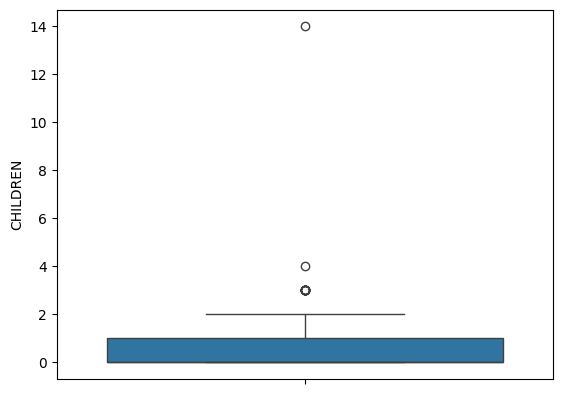

In [44]:
#create plot to detect outliers
sns.boxplot(df['CHILDREN'])

<Axes: ylabel='Annual_income'>

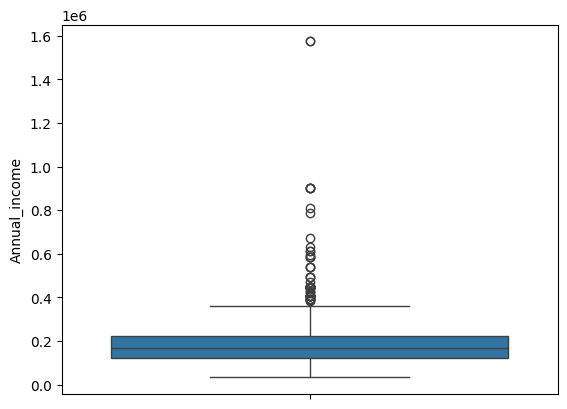

In [45]:
sns.boxplot(df['Annual_income'])

<Axes: ylabel='AGE_YEARS'>

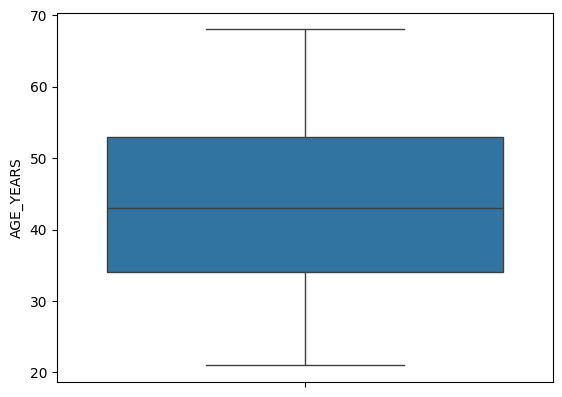

In [46]:
sns.boxplot(df['AGE_YEARS'])

<Axes: ylabel='YEARS_EMPLOYED'>

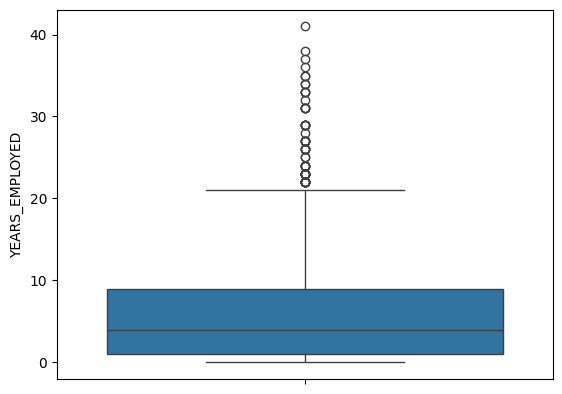

In [47]:
sns.boxplot(df['YEARS_EMPLOYED'])

<Axes: ylabel='Family_Members'>

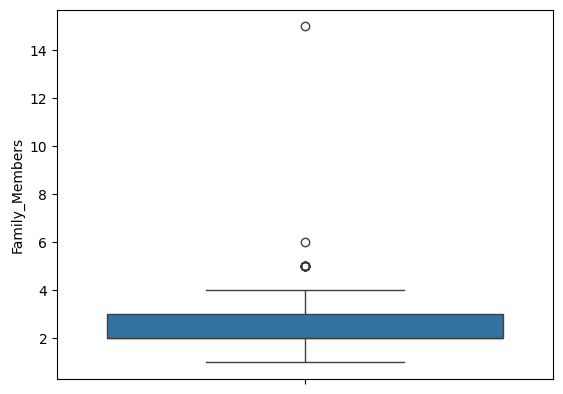

In [48]:
sns.boxplot(df['Family_Members'])

# Removing Outliers

In [49]:
high_bound = df['CHILDREN'].quantile(0.999)
print('high_bound :', round(high_bound,2))
low_bound = df['CHILDREN'].quantile(0.001)
print('low_bound :', low_bound)

high_bound : 3.45
low_bound : 0.0


In [50]:
df = df[(df['CHILDREN']>=low_bound) & (df['CHILDREN']<=high_bound)]

In [51]:
high_bound = df['Annual_income'].quantile(0.999)
print('high_bound :', round(high_bound,0))
low_bound = df['Annual_income'].quantile(0.001)
print('low_bound :', low_bound)

high_bound : 1207125.0
low_bound : 36981.0


In [52]:
df = df[(df['Annual_income']>=low_bound) & (df['Annual_income']<=high_bound)]

In [53]:
high_bound = df['YEARS_EMPLOYED'].quantile(0.999)
print('high_bound :', round(high_bound,0))
low_bound = df['YEARS_EMPLOYED'].quantile(0.001)
print('low_bound :', low_bound)

high_bound : 37.0
low_bound : 0.0


In [54]:
df = df[(df['YEARS_EMPLOYED']>=low_bound) & (df['YEARS_EMPLOYED']<=high_bound)]

In [55]:
high_bound = df['Family_Members'].quantile(0.999)
print('high_bound :', high_bound)
low_bound = df['Family_Members'].quantile(0.001)
print('low_bound :', low_bound)

high_bound : 5.0
low_bound : 1.0


In [56]:
df = df[(df['Family_Members']>=low_bound) & (df['Family_Members']<=high_bound)]

In [57]:
df.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,AGE_YEARS,YEARS_EMPLOYED,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,51.0,0.0,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37.0,2.0,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,43.0,2.0,2,1
3,5009749,F,Y,N,0,166500.0,Commercial associate,Higher education,Married,House / apartment,37.0,2.0,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37.0,2.0,2,1


In [58]:
# dropping ''Ind_ID' column as it is having only unique values (not required for ML Model)
df.drop('Ind_ID', axis=1, inplace=True)

In [59]:
df.head(2)

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,AGE_YEARS,YEARS_EMPLOYED,Family_Members,label
0,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,51.0,0.0,2,1
1,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37.0,2.0,2,1


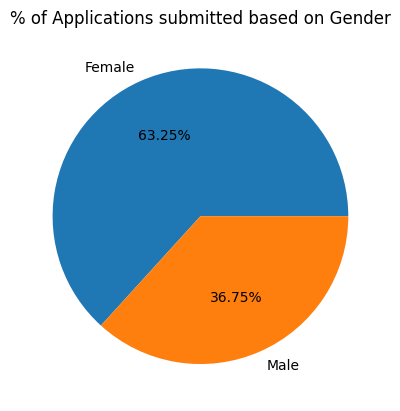

In [60]:
# This graph shows that, majority of application are submitted by Female's
plt.pie(df['GENDER'].value_counts(), labels=['Female', 'Male'], autopct='%1.2f%%')
plt.title('% of Applications submitted based on Gender')
plt.show()

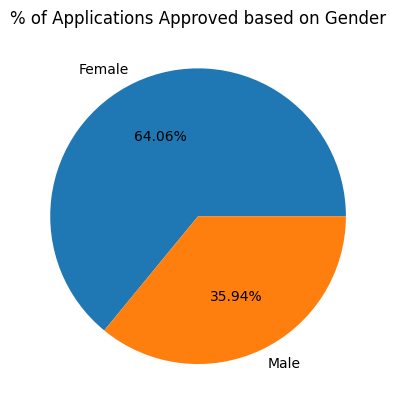

In [61]:
# This graph shows that, majority of application are approved for Female's
plt.pie(df[df['label']==0]['GENDER'].value_counts(), labels=['Female', 'Male'], autopct='%1.2f%%')
plt.title('% of Applications Approved based on Gender')
plt.show()

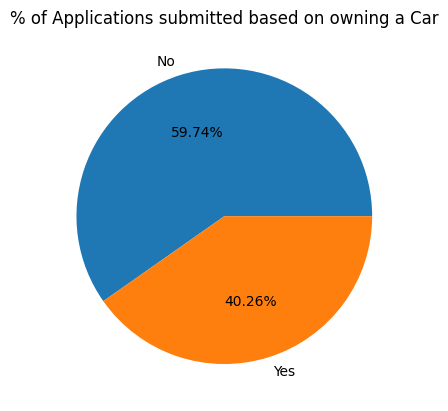

In [62]:
# This graph shows that, majority of applicatant's dont own a car
plt.pie(df['Car_Owner'].value_counts(), labels=['No', 'Yes'], autopct='%1.2f%%')
plt.title('% of Applications submitted based on owning a Car')
plt.show()

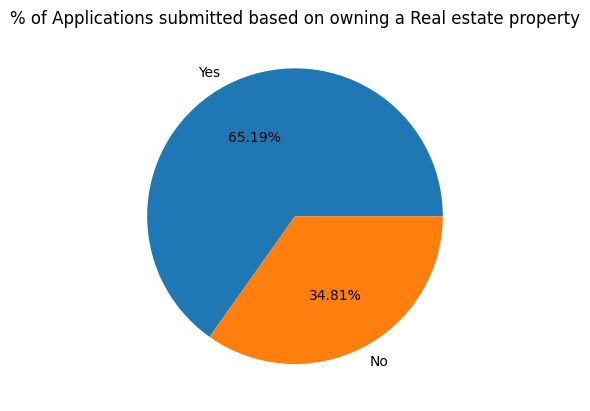

In [63]:
# This graph shows that, majority of applicatant's own a Real Estate property / House
plt.pie(df['Propert_Owner'].value_counts(), labels=['Yes','No'], autopct='%1.2f%%')
plt.title('% of Applications submitted based on owning a Real estate property')
plt.show()

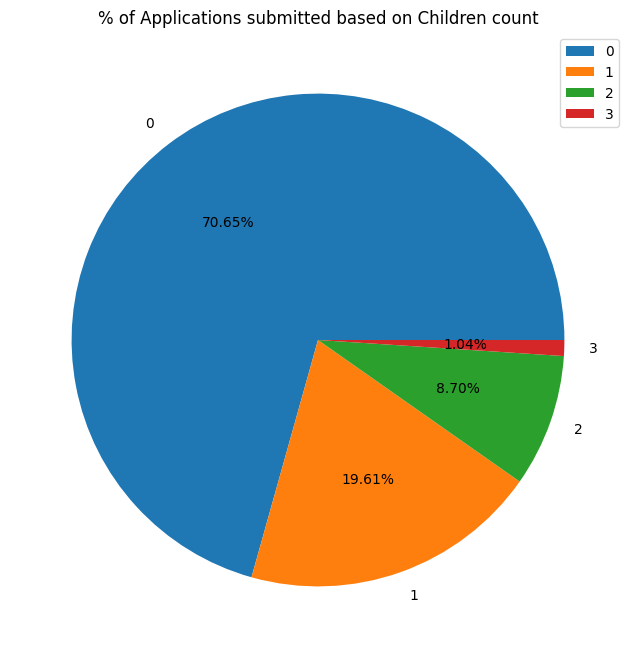

In [64]:
# This graph shows that, majority of applicatant's don't have any children
plt.figure(figsize = (8,8))
plt.pie(df['CHILDREN'].value_counts(), labels=df['CHILDREN'].value_counts().index, autopct='%1.2f%%')
plt.title('% of Applications submitted based on Children count')
plt.legend()
plt.show()

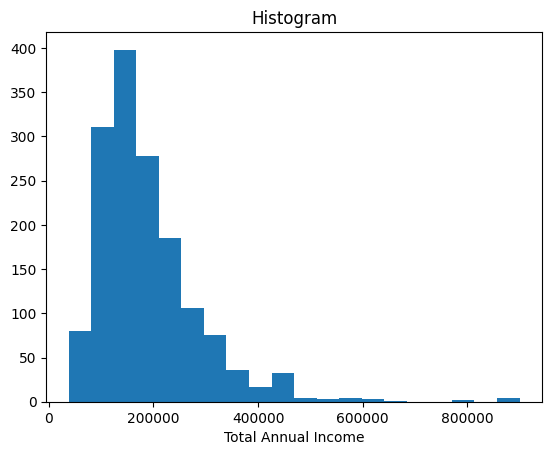

In [65]:
# This graph shows that, majority of applicatant's income lies between 1 to 3 lakh
plt.hist(df['Annual_income'], bins=20)
plt.xlabel('Total Annual Income')
plt.title('Histogram')
plt.show()

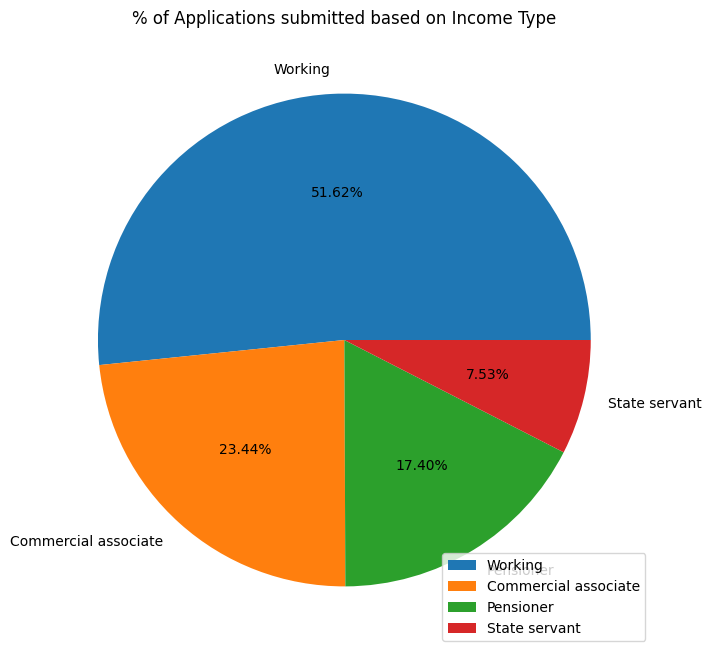

In [66]:
# This graph shows that, majority of applicatant's are working professional
plt.figure(figsize = (8,8))
plt.pie(df['Type_Income'].value_counts(), labels=df['Type_Income'].value_counts().index, autopct='%1.2f%%')
plt.title('% of Applications submitted based on Income Type')
plt.legend()
plt.show()

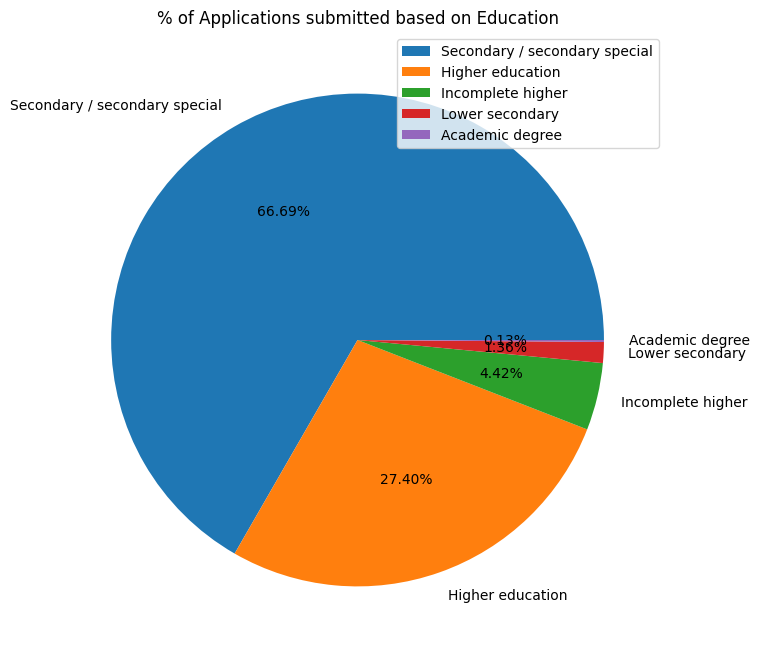

In [67]:
# This graph shows that, majority of applicatant's completed the Secondary Education
plt.figure(figsize=(8,8))
plt.pie(df['EDUCATION'].value_counts(), labels=df['EDUCATION'].value_counts().index, autopct='%1.2f%%')
plt.title('% of Applications submitted based on Education')
plt.legend()
plt.show()

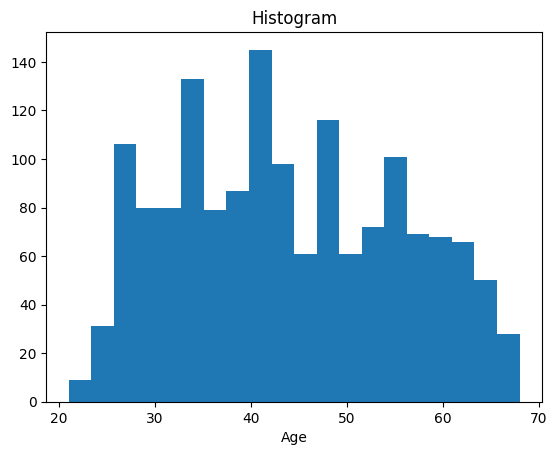

In [68]:
# This graph shows that, majority of applicatant's are 25 to 65 years old
plt.hist(df['AGE_YEARS'], bins=20)
plt.xlabel('Age')
plt.title('Histogram')
plt.show()

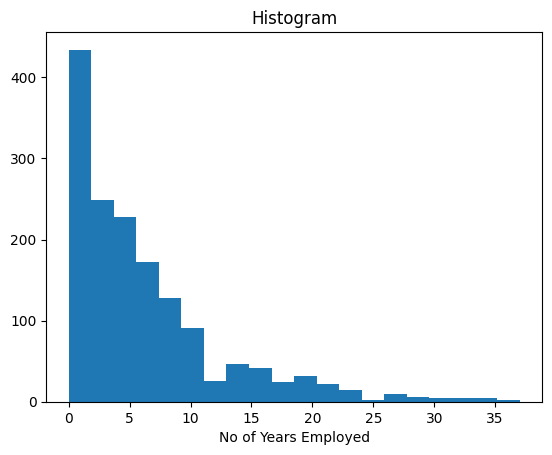

In [69]:
# This graph shows that, majority of applicatant's are Employed for 0 to 7 years
plt.hist(df['YEARS_EMPLOYED'], bins=20)
plt.xlabel('No of Years Employed')
plt.title('Histogram')
plt.show()

# Feature Selection

In [70]:
df.head()

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,AGE_YEARS,YEARS_EMPLOYED,Family_Members,label
0,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,51.0,0.0,2,1
1,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37.0,2.0,2,1
2,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,43.0,2.0,2,1
3,F,Y,N,0,166500.0,Commercial associate,Higher education,Married,House / apartment,37.0,2.0,2,1
4,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37.0,2.0,2,1


In [71]:
cat_columns

['GENDER',
 'Car_Owner',
 'Propert_Owner',
 'Type_Income',
 'EDUCATION',
 'Marital_status',
 'Housing_type']

In [72]:
#Converting all Non-Numerical Columns to Numerical
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in cat_columns:

        df[col] = le.fit_transform(df[col])
df.head()

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,AGE_YEARS,YEARS_EMPLOYED,Family_Members,label
0,1,1,1,0,180000.0,1,1,1,1,51.0,0.0,2,1
1,0,1,0,0,315000.0,0,1,1,1,37.0,2.0,2,1
2,0,1,0,0,315000.0,0,1,1,1,43.0,2.0,2,1
3,0,1,0,0,166500.0,0,1,1,1,37.0,2.0,2,1
4,0,1,0,0,315000.0,0,1,1,1,37.0,2.0,2,1


In [73]:
df.corr()

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,AGE_YEARS,YEARS_EMPLOYED,Family_Members,label
GENDER,1.000000,0.365611,-0.036763,0.058262,0.245137,0.057994,-0.038062,-0.119800,0.080975,-0.186855,-0.028795,0.096368,0.047008
Car_Owner,0.365611,1.000000,0.002202,0.057910,0.210975,0.032858,-0.131625,-0.138573,-0.001052,-0.142668,-0.012029,0.119903,-0.012765
Propert_Owner,-0.036763,0.002202,1.000000,-0.017581,0.033818,-0.055693,-0.018282,0.001601,-0.174897,0.127537,-0.059325,-0.013706,-0.019114
CHILDREN,0.058262,0.057910,-0.017581,1.000000,0.079918,0.065382,-0.084324,-0.186892,0.008600,-0.316451,0.082724,0.875697,-0.029194
Annual_income,0.245137,0.210975,0.033818,0.079918,1.000000,-0.121349,-0.246174,-0.026581,0.019662,-0.099315,0.055428,0.063142,0.033336
Type_Income,0.057994,0.032858,-0.055693,0.065382,-0.121349,1.000000,0.095625,-0.028996,0.024850,-0.174562,0.188775,0.067863,-0.066187
EDUCATION,-0.038062,-0.131625,-0.018282,-0.084324,-0.246174,0.095625,1.000000,0.056985,-0.045389,0.188948,0.017283,-0.080301,-0.029418
Marital_status,-0.119800,-0.138573,0.001601,-0.186892,-0.026581,-0.028996,0.056985,1.000000,-0.008571,0.118174,-0.100916,-0.579232,0.059958
Housing_type,0.080975,-0.001052,-0.174897,0.008600,0.019662,0.024850,-0.045389,-0.008571,1.000000,-0.219029,-0.037892,0.005373,-0.001555
AGE_YEARS,-0.186855,-0.142668,0.127537,-0.316451,-0.099315,-0.174562,0.188948,0.118174,-0.219029,1.000000,-0.033363,-0.287153,0.044688


In [74]:
features =df.drop(['label'], axis=1)
target = df['label']

In [75]:
features.head()

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,AGE_YEARS,YEARS_EMPLOYED,Family_Members
0,1,1,1,0,180000.0,1,1,1,1,51.0,0.0,2
1,0,1,0,0,315000.0,0,1,1,1,37.0,2.0,2
2,0,1,0,0,315000.0,0,1,1,1,43.0,2.0,2
3,0,1,0,0,166500.0,0,1,1,1,37.0,2.0,2
4,0,1,0,0,315000.0,0,1,1,1,37.0,2.0,2


In [76]:
features.head()

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,AGE_YEARS,YEARS_EMPLOYED,Family_Members
0,1,1,1,0,180000.0,1,1,1,1,51.0,0.0,2
1,0,1,0,0,315000.0,0,1,1,1,37.0,2.0,2
2,0,1,0,0,315000.0,0,1,1,1,43.0,2.0,2
3,0,1,0,0,166500.0,0,1,1,1,37.0,2.0,2
4,0,1,0,0,315000.0,0,1,1,1,37.0,2.0,2


# Machine Learning Model

In [77]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features,
                                                    target,
                                                    test_size=0.2,
                                                    random_state = 10)

# Balancing dataset

In [78]:
from sklearn.preprocessing import MinMaxScaler
MMS = MinMaxScaler()
x_train_scaled = pd.DataFrame(MMS.fit_transform(x_train), columns=x_train.columns)
x_test_scaled = pd.DataFrame(MMS.transform(x_test), columns=x_test.columns)

In [79]:
# adding samples to minority class using SMOTE
from imblearn.over_sampling import SMOTE
oversample = SMOTE()

x_train_oversam, y_train_oversam = oversample.fit_resample(x_train_scaled, y_train)
x_test_oversam, y_test_oversam = oversample.fit_resample(x_test_scaled, y_test)

In [80]:
# Original majority and minority class
y_train.value_counts(normalize=True)*100

label
0    88.961039
1    11.038961
Name: proportion, dtype: float64

In [81]:
# after using SMOTE
y_train_oversam.value_counts(normalize=True)*100

label
0    50.0
1    50.0
Name: proportion, dtype: float64

In [82]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

log_model = LogisticRegression()
log_model.fit(x_train_oversam, y_train_oversam)

print('Logistic Model Accuracy : ', log_model.score(x_test_oversam, y_test_oversam)*100, '%')

prediction = log_model.predict(x_test_oversam)
print('\nConfusion matrix :')
print(confusion_matrix(y_test_oversam, prediction))

print('\nClassification report:')
print(classification_report(y_test_oversam, prediction))

Logistic Model Accuracy :  61.111111111111114 %

Confusion matrix :
[[161 109]
 [101 169]]

Classification report:
              precision    recall  f1-score   support

           0       0.61      0.60      0.61       270
           1       0.61      0.63      0.62       270

    accuracy                           0.61       540
   macro avg       0.61      0.61      0.61       540
weighted avg       0.61      0.61      0.61       540



# Decision Tree classification

In [83]:
from sklearn.tree import DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

decision_model = DecisionTreeClassifier(max_depth=12,min_samples_split=8)

decision_model.fit(x_train_oversam, y_train_oversam)

print('Decision Tree Model Accuracy : ', decision_model.score(x_test_oversam, y_test_oversam)*100, '%')

prediction = decision_model.predict(x_test_oversam)
print('\nConfusion matrix :')
print(confusion_matrix(y_test_oversam, prediction))

print('\nClassification report:')
print(classification_report(y_test_oversam, prediction))

Decision Tree Model Accuracy :  73.33333333333333 %

Confusion matrix :
[[227  43]
 [101 169]]

Classification report:
              precision    recall  f1-score   support

           0       0.69      0.84      0.76       270
           1       0.80      0.63      0.70       270

    accuracy                           0.73       540
   macro avg       0.74      0.73      0.73       540
weighted avg       0.74      0.73      0.73       540



# Random Forest classification

In [84]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier

RandomForest_model = RandomForestClassifier(n_estimators=250,
                                            max_depth=12,
                                            min_samples_leaf=16)

RandomForest_model.fit(x_train_oversam, y_train_oversam)

print('Random Forest Model Accuracy : ', RandomForest_model.score(x_test_oversam, y_test_oversam)*100, '%')

prediction = RandomForest_model.predict(x_test_oversam)
print('\nConfusion matrix :')
print(confusion_matrix(y_test_oversam, prediction))

print('\nClassification report:')
print(classification_report(y_test_oversam, prediction))

Random Forest Model Accuracy :  84.07407407407408 %

Confusion matrix :
[[246  24]
 [ 62 208]]

Classification report:
              precision    recall  f1-score   support

           0       0.80      0.91      0.85       270
           1       0.90      0.77      0.83       270

    accuracy                           0.84       540
   macro avg       0.85      0.84      0.84       540
weighted avg       0.85      0.84      0.84       540




# Support Vector Machine classification

In [85]:
from sklearn.svm import SVC

svc_model = SVC()

svc_model.fit(x_train, y_train)

print('Support Vector Classifier Accuracy : ', svc_model.score(x_test, y_test)*100, '%')

prediction = svc_model.predict(x_test)
print('\nConfusion matrix :')
print(confusion_matrix(y_test, prediction))

print('\nClassification report:')
print(classification_report(y_test, prediction))

Support Vector Classifier Accuracy :  87.66233766233766 %

Confusion matrix :
[[270   0]
 [ 38   0]]

Classification report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.93       270
           1       0.00      0.00      0.00        38

    accuracy                           0.88       308
   macro avg       0.44      0.50      0.47       308
weighted avg       0.77      0.88      0.82       308



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# XGBoost classification

In [86]:
from xgboost import XGBClassifier

XGB_model = XGBClassifier()

XGB_model.fit(x_train_oversam, y_train_oversam)

print('XGBoost Model Accuracy : ', XGB_model.score(x_test_oversam, y_test_oversam)*100, '%')

prediction = XGB_model.predict(x_test_oversam)
print('\nConfusion matrix :')
print(confusion_matrix(y_test_oversam, prediction))

print('\nClassification report:')
print(classification_report(y_test_oversam, prediction))

XGBoost Model Accuracy :  90.55555555555556 %

Confusion matrix :
[[257  13]
 [ 38 232]]

Classification report:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       270
           1       0.95      0.86      0.90       270

    accuracy                           0.91       540
   macro avg       0.91      0.91      0.91       540
weighted avg       0.91      0.91      0.91       540



# Validation

**K-Fold Cross Validation**

In [87]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold = KFold(3)

In [88]:
# Decision Tree classification

results=cross_val_score(decision_model,features,target,cv=kfold)
print(results*100,'\n')

print(np.mean(results)*100)

[66.14785992 86.35477583 90.64327485] 

81.04863686814673


In [89]:
# Random Forest classification

results=cross_val_score(RandomForest_model,features,target,cv=kfold)
print(results*100,'\n')

print(np.mean(results)*100)

[ 66.14785992 100.         100.        ] 

88.715953307393


In [90]:
# XGBoost classification

results=cross_val_score(XGB_model,features,target,cv=kfold)
print(results*100,'\n')

print(np.mean(results)*100)

[66.14785992 95.5165692  96.10136452] 

85.92193121512528


# Conclusion

As we have seen that, XGBoost Model is giving highest accuracy of 90 %, hence we will use XGBoost Model for predicion